<a href="https://colab.research.google.com/github/angelammatta/Coding-portfolio/blob/AP-CSA-Data-Science-and-AI-Project/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic of data: using mortality Vs. incidence  of cancer to predict what continent the country is in 

1. find data


   I already found the data for this from the WHO, it has all of the continents but for the sake of simplifying things I may sort the data to make it only focus on Europe vs. Asia. 

   The goal of the project is going to push for better openness in the scientific community between the west and the east. This idea came from the mounting tensions between the west and east over COVID research and overall mounting pressure between the two because of past relations. 


2. sort data 


So in deciding to only use the data from the coutries on the Asian and European continent, the data must be sorted to include only those continents.

6/7/21: sorted data 


3. set up the basics 

   a.sigmoid 6/7/21 complete

   b.NN(actual AI )  6/7/21 complete

   c.weight training 6/12/21 complete

   d. linear regression (used for ML)   6/12/21 complete

   6/12/21 note: I am having trouble with finding the learning rate so that it can be 93% accurate, I have been getting 92% though 

   6/13/21 note: ok I think I found the learning rate, I am able to consistently get it to run with % accuracy between 84% to 94% 

   There is the case with it changing output every time that I run it though,thus the range for accuracy 

4. train the AI 

   Remove 21 points from the data set and use the NN to guess what continent the country is on.

   6/13/21 completed, I removed 10 Europe and 11 Asia variables

   



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: overflow encountered in exp


asia
asia
asia
asia
asia
asia
asia
asia
asia
asia
asia
asia
europe
europe
europe
europe
europe
europe
europe
europe
europe
asia count
12

Europe Count 
9

there should be 11 Asia and 10 europe


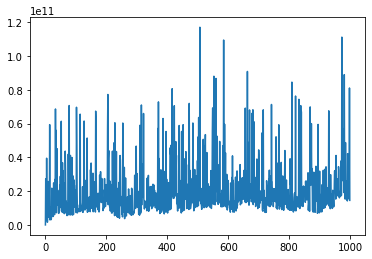

In [ ]:
import numpy 
import math 
from matplotlib import pyplot as plt 


# if neural network gives above 0.5 -> country on EU continent, below 0.5 -> asian continent 
# 1 for EU, 0 for Asia 


#section to set up data, incidence, mortality and type 

data = [[372.8,104.9,1],
        [351.1,113.7,1],
        [349.6,107.7,1],
        [338.2,149,1],
        [327.5,91.7,1],
        [317.6,83.3,1],
        [313.2,102.3,1],
        [309,115.9,1],
        [299.2,151.7,1],
        [301.5,124.5,1],
        [296.8,141.3,1],
        [293.4,122.1,1],
        [292.6,106.2,1],
        [290.8,133.3,1],
        [288.6,87.2,1],
        [278.5,116.3,1],
        [271.2,84.3,1],
        [267.3,137.5,1],
        [264.7,107.2,1],
        [263.1,131.9,1],
        [255.7,95.8,1],
        [252.8,118,1],
        [247.1,119.7,1],
        [244.6,79.8,1],
        [231.5,120.4,1],
        [227,128.7,1],
        [220.4,113.6,1],
        [148.1,74.9,1],
        [212.8,102.5,1],
        [204.8,129.4,0],
        [202.9,126.8,0],
        [165.8,117.8,0],
        [162,100,0],
        [159.7,106,0],
        [156.8,85.6,0],
        [152.7,94,0],
        [149.3,95.6,0],
        [224,107.8,0],
        [143.9,87.3,0],
        [141.1,85.1,0],
        [136.8,99,0],
        [134.9,84.7,0],
        [130.6,88.2,0],
        [128.8,83.7,0],
        [123.7,72.8,0],
        [115.7,63.6,0],
        [110.4,74.3,0],
        [108.8,81.2,0],
        [107.2,64.5,0],
        [106.7,55.9,0],
        [105.4,57.2,0],
        [103.8,64.6,0],
        [97.1,63.1,0],
        [89.7,61.9,0],
        [80.9,54.8,0],
        [285.1,81.5,0],
        [215.6,176.2,0],
        [242.7,75.5,0],
        [240.7,90.6,0],
        [234.3,113.7,0],
        [233,111.5,0]
        ]


# mystery vars 

mysteryData = [  [89.7,64.2],#Asia
                 [97,76.5],#Asia
                 [106.2,75.3],#Asia
                 [108.1,72.4],#Asia
                 [112.2,64.3],#Asia
                 [135.3,97],#Asia
                 [155.3,88.5],#Asia
                 [161.5,110.8],#Asia
                 [164,100.5],#Asia
                 [96.4,51.3],#Asia
                 [81.9,66.6],#Asia
                 [227.1,128.1],#Europe
                 [261.8,103.8],#Europe
                 [256.7,103.1],#Europe
                 [265.1,84],#Europe
                 [277.2,90.3],#Europe
                 [290.2,145.2],#Europe
                 [292.6,91.1],#Europe
                 [319.9,100.5],#Europe
                 [349.2,101.3],#Europe
                 [291.9,87.7]#Europe
                   ]








## start with the basics 



##sigmoid for the neural network 
def sigmoid(x):
  return 1/(1 + numpy.exp(-x))

# dervative of sigmoid
def sigmoidDer(x):
  return sigmoid(x)*(1-sigmoid(x))




# learning rate for NN 
#costs to  see if overtime they decrease 

learningRate = 0.18
costs = []


## need to find w1,w2 and b 
# start with random for all

w1 = numpy.random.randn()
w2 = numpy.random.randn()
b = numpy.random.randn()

# training loop 

for i in range(10000):
  randoInt = numpy.random.randint(len(data))
  point = data[randoInt]
  
  z = point[0] * w1 + point[1] * w2 + b
  predict = sigmoid(z)#NN prediction

  target = point[2]

  ## cost function
  cost = numpy.square(predict - target)
 

  if i % 10 == 0:
   costSum = 0
   for j in range(len(data)):
     point = data[j]
     pointPredict= point[0] * w1 + point[1] * w2 + b   
     costSum += numpy.square(pointPredict - point[2])
   costs.append(costSum)



## deriving everything to help find the derivatives of the cost with chain rule 
  # deriv of cost
  derivCost = 2 * (predict - target)

  #deriv of sigmoid
  derivSig = sigmoidDer(z)

  #deriv Z with respect to deriv w1 
  derZ_derw1 = point[0]

  #deriv Z with respect to deriv w2
  derZ_derw2 = point[1]

  #deriv Z with respect to deriv b
  derZ_derB = 1 
  
  # partial derivatives

  derivCost_dz = derivCost * derivSig

  #deriv cost with respect to deriv w1 (chain rule) derive of cost * derive of sigmoid * dZ/dw1
  derivCost_derivw1 =  derivCost * derZ_derw1
  
  # deriv cost with respect to deriv w2(chain rule)
  derivCost_derivw2 =  derivCost * derZ_derw2

  # deriv cost with respect to deriv B(chain rule)
  derivCost_derB =  derivCost * derZ_derB

  

  # calc for w1,w2,and b 
  w1 = w1 - learningRate * derivCost_derivw1
  w2 = w2 - learningRate * derivCost_derivw2
  b = b - learningRate * derivCost_derB
  




plt.plot(costs)



countRightEU = 0 
countRightAsia = 0 

for i in mysteryData:
  z = w1 * i[0] + w2 * i[1] + b
  predict = sigmoid(z)
  if predict > 0.5:
    countRightEU= countRightEU + 1
    print("europe")
  
  elif predict < 0.5:
    countRightAsia= countRightAsia + 1
    print("asia")
  





print("asia count")
print(countRightAsia)

print()

print("Europe Count ")
print(countRightEU)

print()

print("there should be 11 Asia and 10 europe")


